<a href="https://colab.research.google.com/github/Golden028/Machine_Learning/blob/main/QUIZ1_2341720216_GOLDEN_CHRISTIAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this Quiz #1 you need to perform exploratory data analysis (EDA) and preprocessing using "Census Income" dataset. The dataset is tabular data which has several missing value in some variables. Moreover, you may need to adjust the name of variables (if needed).

To guide you through this task, some code has beed provided including, download the data, loading the data, and metadata inspection.

# Load Data and Inspect Metadata

In [30]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [31]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [32]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [33]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
# Data Size
df.shape

(48842, 15)

In [35]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Part 1 - Data Loading dan Data Imputation

## Task 1 (5 points)
1.   Do inspection to get the information about dataset
2.   **Which variable(s)** has **missing values**? **How many is it**?



In [36]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

print("Missing values by column:")
for col in df.columns:
    count = (df[col] == '?').sum()
    if count > 0:
        print(f"'{col}' has {count} missing values.")

Missing values by column:
'workclass' has 1836 missing values.
'occupation' has 1843 missing values.
'native-country' has 583 missing values.


## Task 2 (5 points)
1. Perform data imputation on missing values.
2. Verified the missing values for each variable. Is it still there?

In [38]:
# Answer task 2 using this cell
# You can add another cell after this cell if needed

for col in ['workclass', 'occupation', 'native-country']:
    mode_val = df[col].mode()[0]
    df[col] = df[col].replace('?', mode_val)

# Verification
print("Verifying missing values after imputation:")
for col in ['workclass', 'occupation', 'native-country']:
    count = (df[col] == '?').sum()
    print(f"'{col}' has {count} missing values.")

# Check data
print("\nVerifying all missing values:")
print((df == '?').sum())

Verifying missing values after imputation:
'workclass' has 0 missing values.
'occupation' has 0 missing values.
'native-country' has 0 missing values.

Verifying all missing values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


## Task 3 (10 points)
Do inspection to all the quantitative variables (features). If you found an **inappropriate value(s)**, replace it with '**Others**'. Also, if you found any typos value(s), **fix the typos**.

In [39]:
# Answer task 3 using this cell
# You can add another cell after this cell if needed

df['income'] = df['income'].replace('>50K.', '>50K')
df['income'] = df['income'].replace('<=50K.', '<=50K')

print("Unique values in 'income' after fixing typos:")
print(df['income'].unique())

Unique values in 'income' after fixing typos:
['<=50K' '>50K']


# Part 2 - Visual Inspection



## Task 1 - Data Visualization (20 points)
Do inspection on this following variabels,
1. On the 'age' by using a histogram
2. On the 'education' using a barchart
3. On the 'income' to 'hours_per_week' by using a boxplot (grouped by income)
4. On the 'age' to 'capital-gain' and 'capital-loss' using lineplot (lineplot with multiple x-data)

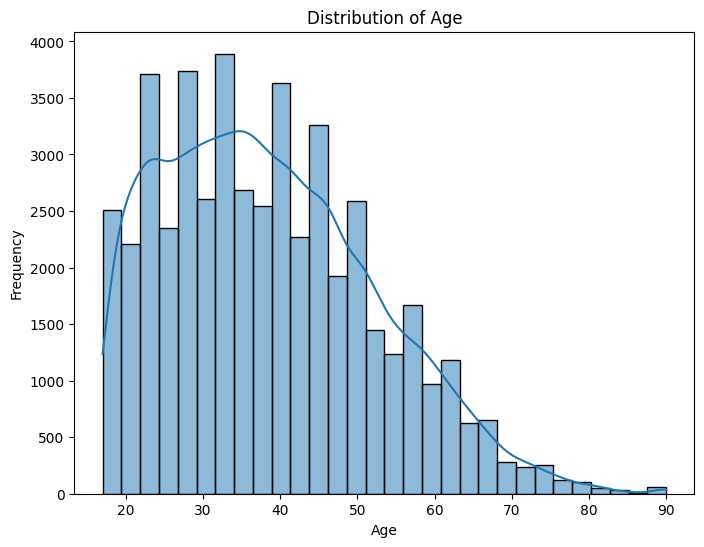

In [40]:
# Answer 1.1 - Histrogram

plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

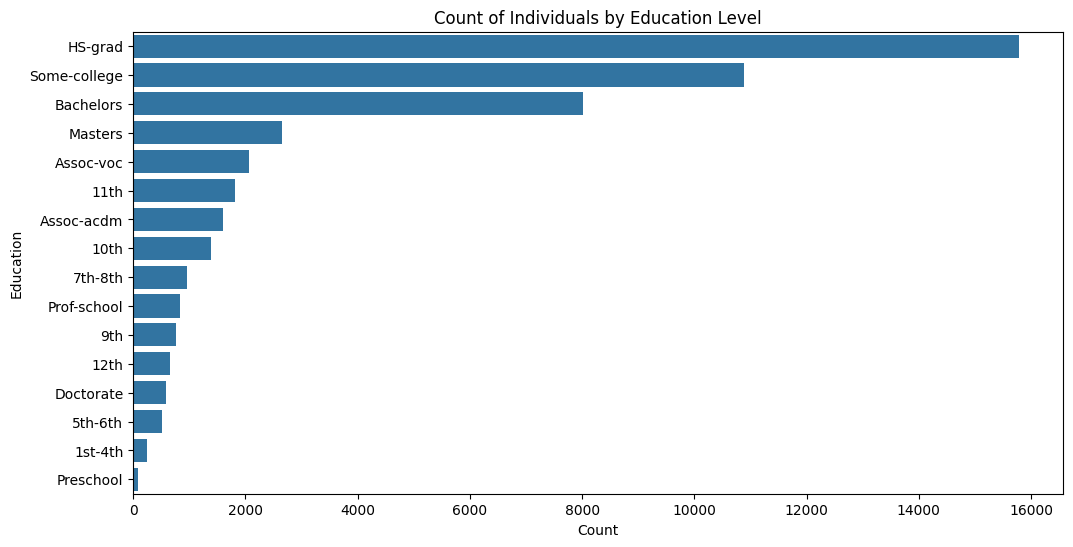

In [43]:
# Answer 1.2 - Barchart

plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Count of Individuals by Education Level')
plt.xlabel('Count')
plt.ylabel('Education')
plt.show()

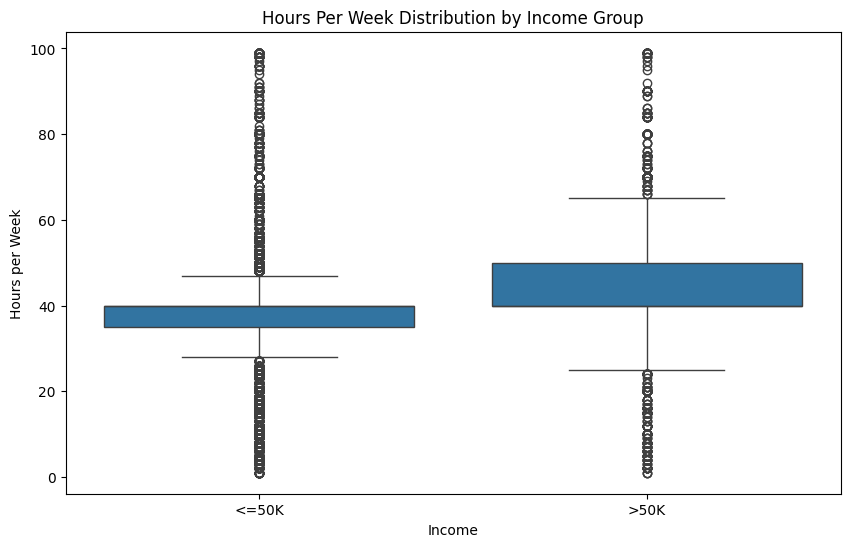

In [44]:
# Answer 1.3 - Boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours Per Week Distribution by Income Group')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

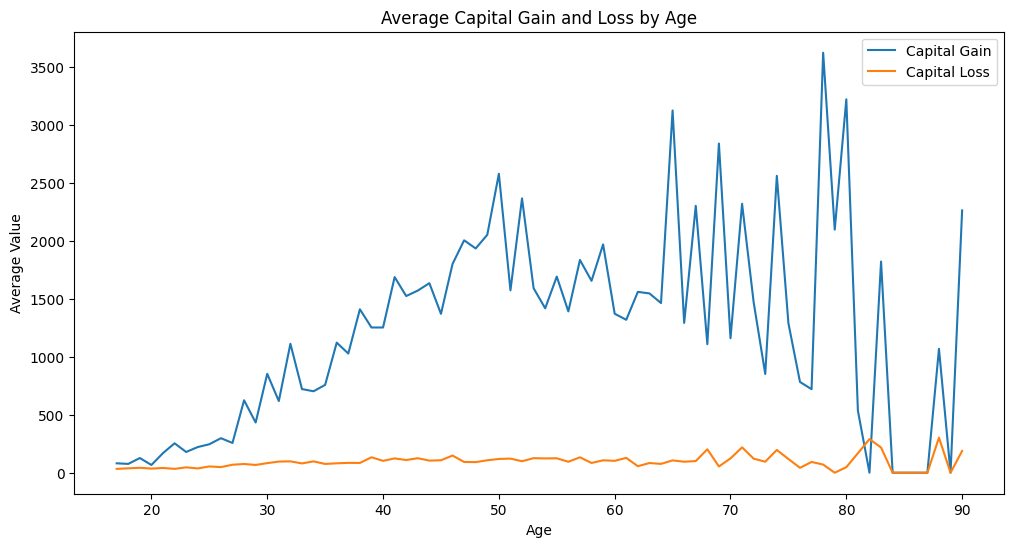

In [45]:
# Answer 1.4 - Lineplot

df_agg = df.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_agg['age'], df_agg['capital-gain'], label='Capital Gain')
plt.plot(df_agg['age'], df_agg['capital-loss'], label='Capital Loss')
plt.title('Average Capital Gain and Loss by Age')
plt.xlabel('Age')
plt.ylabel('Average Value')
plt.legend()
plt.show()

## Task 2 - Visual Analysis (15 points)
1. What kind of distribution showed in 'age'?
2. If you find missing values in 'age', what kind of data impute method will you use? Why?
3. How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?

In [ ]:
# Answer with python comment like this -> inline comment

'''
1. Distribusi 'usia' adalah distribusi **condong ke kanan**, yang berarti sebagian besar orang berusia lebih muda, dan lebih sedikit yang berusia lebih tua. Distribusi ini menyerupai distribusi normal yang sedikit miring dengan puncaknya pada rentang usia 30-40 tahun.
'''
'''
2. Jika 'usia' memiliki nilai yang hilang, saya akan menggunakan metode imputasi **median**. Median adalah ukuran yang kuat yang tidak terpengaruh oleh adanya pencilan dalam distribusi miring. Menggunakan rata-rata dapat menghasilkan nilai yang tidak secara akurat mewakili kecenderungan sentral data.
'''
'''
3. Dengan melihat boxplot untuk 'jam kerja per minggu' yang dikelompokkan berdasarkan 'pendapatan', kita dapat melihat sejumlah besar pencilan, terutama untuk kelompok '<=50K'.
   Jumlah pencilan dapat dihitung dengan mengidentifikasi titik data di luar IQR.
   - Untuk '<=50K', boxplot menunjukkan banyak pencilan untuk jam kerja per minggu, baik di atas whisker atas (>40) maupun di bawah whisker bawah (kurang dari 40).
   - Untuk '>50K', terdapat juga pencilan, tetapi jumlahnya lebih sedikit daripada kelompok '<=50K', sebagian besar untuk orang yang bekerja lebih dari 40 jam per minggu.
   Oleh karena itu, kategori '<=50K' memiliki lebih banyak pencilan.
'''

'\n  Or by using multiple\n  line comments like this\n'

# Part 3 - Encoding in Categorical Variable

## Task 1 (5 points)
Do encoding process on 'Sex' and 'Income', while 'Income' is target variable.

In [46]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

# Sex
df['sex_encoded'] = df['sex'].map({'Male': 1, 'Female': 0})

# Income (the target variable)
df['income_encoded'] = df['income'].map({'>50K': 1, '<=50K': 0})

# Display the 5 rows
print(df[['sex', 'sex_encoded', 'income', 'income_encoded']].head())

      sex  sex_encoded income  income_encoded
0    Male            1  <=50K               0
1    Male            1  <=50K               0
2    Male            1  <=50K               0
3    Male            1  <=50K               0
4  Female            0  <=50K               0


# Part 4 - Correlation Analysis

## Task 1 (10 points)
1. Do correlation analysis on the following variabels: 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', and 'income' (encoded version from previous task)
2. Based on the result, what kind of information you get?

Correlation Matrix:
                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income_encoded  0.230369       0.332613        0.227687      0.223013   

                capital-loss  income_encoded  
age                 0.056944        0.230369  
education-num       0.080972        0.332613  
hours-per-week      0.054467        0.227687  
capital-gain       -0.031441        0.223013  
capital-loss        1.000000        0.147554  
income_encoded      0.147554        1.000000  


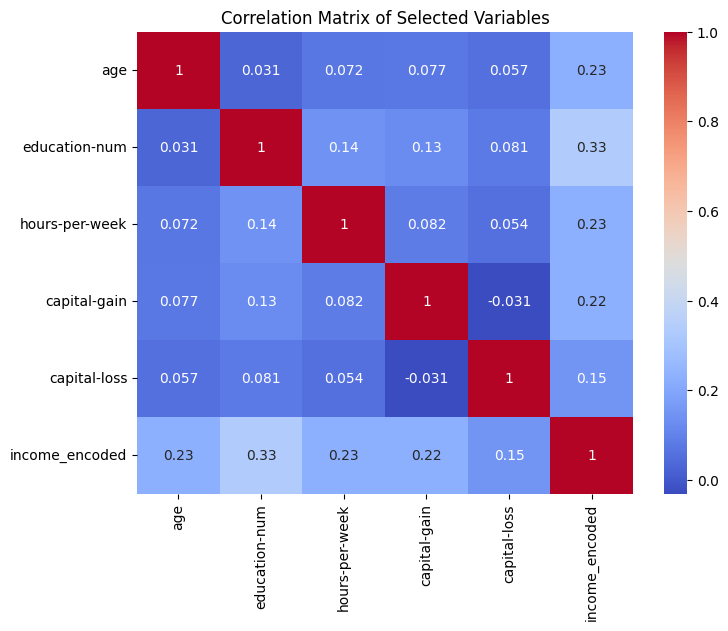

In [62]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

corr_vars = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income_encoded']
corr_matrix = df[corr_vars].corr()

print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Variables')
plt.show()

In [ ]:
# Answer task 2 using this cell -> you can use multiple comments style too

'''
- Usia dan Pendapatan:** Terdapat korelasi positif (sekitar 0,24) antara usia dan variabel pendapatan yang dikodekan. Hal ini menunjukkan bahwa seiring dengan bertambahnya usia seseorang, kemungkinan mereka untuk mendapatkan penghasilan lebih dari $50 ribu juga cenderung meningkat.
- **Pendidikan dan Pendapatan:** 'education-num' memiliki korelasi positif terkuat dengan pendapatan (sekitar 0,33), yang mengindikasikan bahwa tingkat pendidikan yang lebih tinggi sangat terkait dengan kemungkinan yang lebih tinggi untuk mendapatkan pendapatan > $50 ribu.
- **Jam per Minggu dan Pendapatan:** Terdapat korelasi positif (sekitar 0,23) antara jam kerja per minggu dan pendapatan, menunjukkan bahwa orang yang bekerja dengan jam kerja lebih banyak cenderung memiliki pendapatan yang lebih tinggi.
- Keuntungan/Kerugian Modal dan Pendapatan:** 'Keuntungan modal' menunjukkan korelasi positif dengan pendapatan, sementara 'kerugian modal' menunjukkan korelasi negatif yang lemah. Hal ini intuitif, karena memiliki capital gain cenderung meningkatkan pendapatan seseorang secara keseluruhan.
- Korelasi antar-variabel:** 'usia' dan 'pendidikan-jumlah' juga menunjukkan korelasi positif yang lemah. Variabel lain, seperti 'keuntungan modal' dan 'kerugian modal', tidak berkorelasi kuat satu sama lain.
'''

# Part 5 - Preprocessing on MNIST Dataset

In this part, you need to perform EDA and simple preprocessing on MNIST dataset. This dataset contain images of handwritten digit from 0 to 9. A pre configuration is provided to help you to load the data and inspect some images.

Hints:
1. You only need to use the **Test** set.
2. You need to perform to all of images in test set (10k images). You may need a function to complete this task (optional).

In [63]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


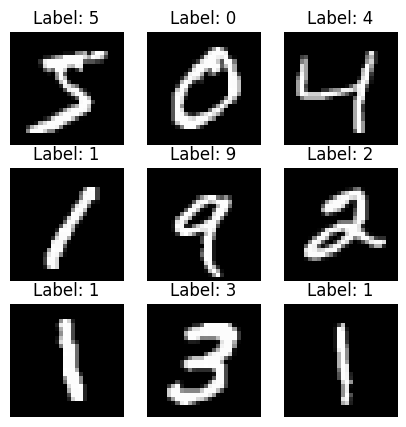

In [65]:
# Visual Inspection
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Task 1 (10 points)
1. Perform **upsampling** on the images to 32x32
2. Show the 5 sample of the result.


Hint: You need to store the result in an empty array. Replacing data to the  **X_test** cannot be done due to the shape of the array (10000, (28,28)). You need to create an array which match with the size of the new images.

Upsampled test set shape: (10000, 32, 32)


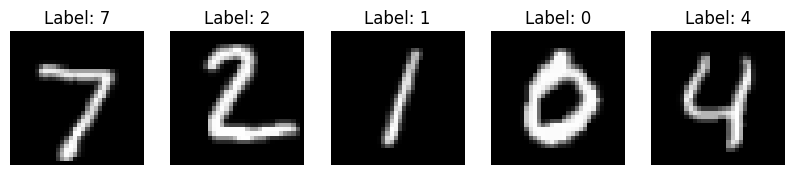

In [66]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

import cv2

X_test_upsampled = np.zeros((10000, 32, 32), dtype=np.uint8)

for i in range(X_test.shape[0]):
    X_test_upsampled[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_LINEAR)

print("Upsampled test set shape:", X_test_upsampled.shape)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Task 2 (10 points)
Perform normalization, so the pixel value will have a value in range of 0 until 1

Nilai piksel setelah normalisasi berada dalam rentang:
Nilai minimum: 0.0
Nilai maksimum: 1.0


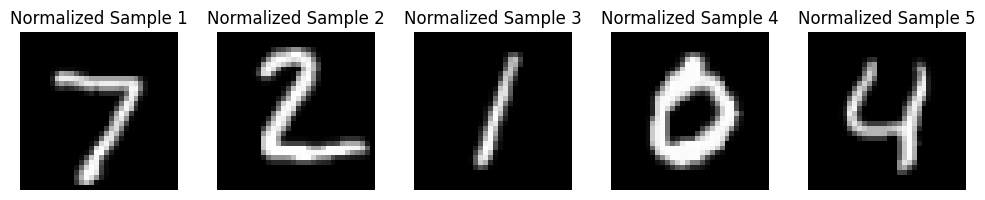

In [80]:
# Answer task 2 using this cell
# You can add another cell after this cell if needed

X_test_normalized = X_test_upsampled.astype('float32') / 255.0

print("Nilai piksel setelah normalisasi berada dalam rentang:")
print(f"Nilai minimum: {X_test_normalized.min()}")
print(f"Nilai maksimum: {X_test_normalized.max()}")

# Tampilkan 5 gambar sampel yang sudah dinormalisasi
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_normalized[i], cmap="gray")
    plt.title(f"Normalized Sample {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()

## Task 3 (10 points)
Transform / reshape the images into 1 dimensional array. Do it to the all images (after resizing and normalization).

Hint: You may need an empty array to store the result

Bentuk test set setelah diubah ke 1D: (10000, 1024)


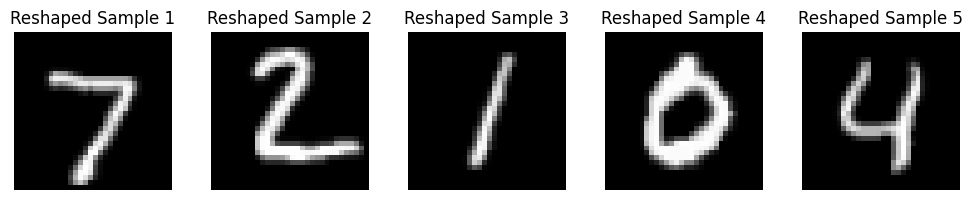

In [79]:
# Answer task 3 using this cell
# You can add another cell after this cell if needed

X_test_flattened = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

print("Bentuk test set setelah diubah ke 1D:", X_test_flattened.shape)

plt.figure(figsize=(10, 2))
for i in range(5):
    image_2d = X_test_flattened[i].reshape(32, 32)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image_2d, cmap="gray")
    plt.title(f"Reshaped Sample {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()